<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/GenAI/BasicLLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Building a Small Language Model from Scratch

In this project, we aim to build a small Language Model (LLM) from scratch to demonstrate the essential steps involved in creating a language model. Although the model we build will be relatively small and may not achieve state-of-the-art performance, it will serve as a foundational example for understanding the key components and processes in LLM development.

## Project Overview

### Objectives
1. **Understand the Basics**: Learn the fundamental concepts and components of a language model.
2. **Hands-On Experience**: Gain practical experience in building, training, and evaluating a small language model.
3. **Performance Insight**: Recognize the limitations of small models and the importance of scale in achieving better performance.

### Steps Involved
1. **Data Preparation**: Load and preprocess a dataset using standard libraries.
2. **Model Definition**: Create a small transformer-based language model.
3. **Training**: Train the model using the prepared dataset.
4. **Evaluation**: Assess the model's performance and identify areas for improvement.
5. **Prediction**: Use the trained model to make predictions on new input text.

## Performance Expectations
Given the small size of the model and the limited amount of training data, the performance of the model will not be on par with larger, more complex models. However, this project serves as a starting point for understanding the principles behind language models.

## Future Improvements
To enhance the performance of the model, consider the following steps:
- **Increase Model Size**: Use a larger transformer model with more layers and parameters.
- **More Data**: Train the model on a larger and more diverse dataset.
- **Advanced Techniques**: Implement advanced training techniques such as learning rate scheduling, gradient clipping, and mixed precision training.
- **Fine-Tuning**: Fine-tune a pre-trained model on your specific task to leverage transfer learning.

By following these steps and continuously iterating on the model, you can progressively improve its performance and capabilities.
```



## Import Libraries
First, we need to install the required libraries:

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 whic

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from torch.utils.data import DataLoader
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Set Device (CPU/GPU)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Define Hyperparameters

In [10]:
embed_dim = 128    # Embedding dimension
num_heads = 4      # Number of attention heads
num_layers = 2     # Number of transformer layers
ffn_hidden_dim = 512  # Feed-forward network hidden dimension
seq_length = 20    # Maximum sequence length
batch_size = 32    # Batch size for training
num_epochs = 2 # 10    # Number of training epochs

## Load and Prepare Dataset

In [5]:
# Tokenizer
tokenizer = nltk.word_tokenize

# Function to yield data, tokenized
def yield_tokens(data_iter):
    for item in data_iter:
        yield tokenizer(item['text'])

# Load AG_NEWS dataset
dataset = load_dataset('ag_news')

# Build vocabulary
texts = [" ".join(tokenizer(item['text'])) for item in dataset['train']]
vectorizer = CountVectorizer()
vectorizer.fit(texts)
vocab = vectorizer.vocabulary_
vocab_size = len(vocab) + 1  # +1 for <unk> token
print(f"Vocabulary size: {vocab_size}")

# Text processing function
def text_to_indices(text):
    tokens = tokenizer(text)
    indices = [vocab.get(token, vocab_size - 1) for token in tokens]  # vocab_size - 1 is the index for <unk>
    return indices

def collate_batch(batch):
    labels, texts = [], []
    for item in batch:
        labels.append(item['label'])
        processed_text = text_to_indices(item['text'])
        texts.append(processed_text)
    labels = torch.tensor(labels, dtype=torch.long)
    texts = nn.utils.rnn.pad_sequence([torch.tensor(text, dtype=torch.long) for text in texts], padding_value=vocab_size - 1)
    return labels, texts

# DataLoader
train_dataloader = DataLoader(dataset['train'], batch_size=batch_size, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(dataset['test'], batch_size=batch_size, shuffle=True, collate_fn=collate_batch)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Vocabulary size: 65004


## Define the Transformer Model

In [6]:
class SmallTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, num_layers, ffn_hidden_dim, seq_length):
        super(SmallTransformer, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        # positional_encoding is no longer a Parameter, but is created dynamically in forward
        # self.positional_encoding = nn.Parameter(torch.zeros(1, seq_length, embed_dim))
        encoder_layers = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=ffn_hidden_dim)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc_out = nn.Linear(embed_dim, vocab_size)

    def forward(self, src):
        # Create positional encoding dynamically based on the input sequence length
        # src.size(1) gives the actual sequence length of the input
        positional_encoding = torch.zeros(1, src.size(1), self.embedding.embedding_dim, device=src.device)
        # use register_buffer to make it a non-trainable parameter, moved to the correct device

        embedded = self.embedding(src) + positional_encoding
        encoded = self.transformer_encoder(embedded)
        output = self.fc_out(encoded)
        return output

model = SmallTransformer(vocab_size, embed_dim, num_heads, num_layers, ffn_hidden_dim, seq_length).to(device)
print(model)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


SmallTransformer(
  (embedding): Embedding(65004, 128)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=512, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=512, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc_out): Linear(in_features=128, out_features=65004, bias=True)
)


## Define Loss Function and Optimizer

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training Loop

In [11]:
from IPython.display import clear_output, display

train_losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    batch_count = 0

    for labels, texts in train_dataloader:
        labels = labels.to(device)
        texts = texts.to(device)

        optimizer.zero_grad()

        output = model(texts)
        output = output.view(-1, vocab_size)
        texts = texts.view(-1)

        loss = criterion(output, texts)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        batch_count += 1

        # Print progress within the epoch
        progress_msg = f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_count}/{len(train_dataloader)}], Loss: {loss.item():.4f}'
        clear_output(wait=True)
        display(progress_msg)

    avg_loss = total_loss / len(train_dataloader)
    print(f'\nEpoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    train_losses.append(avg_loss)

'Epoch [2/2], Batch [3750/3750], Loss: 0.0149'


Epoch [2/2], Loss: 0.0097


## Evaluation (Optional)

In [12]:
model.eval()
total_eval_loss = 0

with torch.no_grad():
    for labels, texts in test_dataloader:
        labels = labels.to(device)
        texts = texts.to(device)

        output = model(texts)
        output = output.view(-1, vocab_size)
        texts = texts.view(-1)

        loss = criterion(output, texts)
        total_eval_loss += loss.item()

avg_eval_loss = total_eval_loss / len(test_dataloader)
print(f'Evaluation Loss: {avg_eval_loss:.4f}')

Evaluation Loss: 0.0041


## Plotting Training Loss

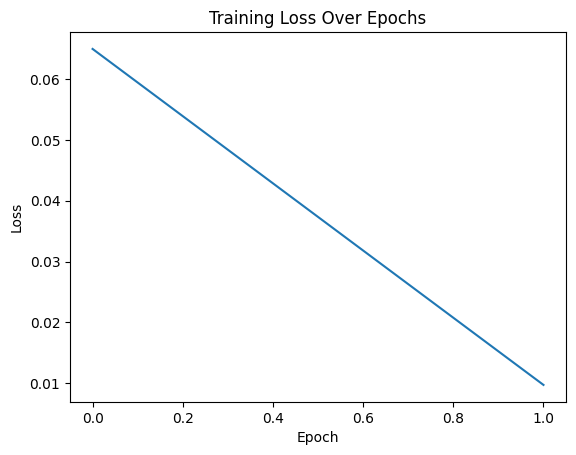

In [13]:
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

In [16]:
# Function to preprocess input text
def preprocess_text(text):
    tokens = tokenizer(text)
    indices = [vocab.get(token, vocab_size - 1) for token in tokens]  # vocab_size - 1 is the index for <unk>
    return torch.tensor(indices, dtype=torch.long).unsqueeze(0).to(device)  # Add batch dimension

# Example text for prediction
example_text = "hello how are you"

# Preprocess the example text
input_tensor = preprocess_text(example_text)

# Set the model to evaluation mode
model.eval()

# Make prediction
with torch.no_grad():
    output = model(input_tensor)
    predicted_indices = output.argmax(dim=-1).cpu().numpy().flatten()

# Convert predicted indices back to tokens
predicted_tokens = [list(vocab.keys())[list(vocab.values()).index(idx)] if idx in vocab.values() else '<unk>' for idx in predicted_indices]

# Print the predicted text
predicted_text = ' '.join(predicted_tokens)
print(f"Predicted Text: {predicted_text}")

Predicted Text: hello how are you
